In [0]:
import tensorflow as tf
device_name=tf.test.gpu_device_name()

if device_name!='/device:GPU:0':
  raise SystemError('GPU Not found')
  
print('Found GPU at {}'.format(device_name))

Found GPU at /device:GPU:0


In [0]:
mnist=tf.contrib.learn.datasets.load_dataset('mnist')


Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-u

In [0]:
print(mnist.train.images[1].shape)

from functools import partial

(784,)


In [0]:
n_inputs = 28 * 28
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20  # codings layer
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

In [0]:
initializer=tf.contrib.layers.variance_scaling_initializer()
tf_dense_layer=partial(tf.layers.dense,
                       activation=tf.nn.elu,
                       kernel_initializer=initializer)

In [0]:
X=tf.placeholder(tf.float32, shape=[None,n_inputs])
hidden1=tf_dense_layer(X,n_hidden1)
hidden2=tf_dense_layer(hidden1,n_hidden2)

hidden3_mean=tf_dense_layer(hidden2,n_hidden3,activation=None)
hidden3_gamma=tf_dense_layer(hidden2,n_hidden3,activation=None)

#add gaussian noise hidden3_gamma
noise=tf.random_normal(tf.shape(hidden3_gamma),dtype=tf.float32)
#actual third hidden layer 
#coding layer
hidden3=hidden3_mean+tf.exp(0.5*hidden3_gamma)*noise

hidden4=tf_dense_layer(hidden3,n_hidden4)
hidden5=tf_dense_layer(hidden4,n_hidden5)

logits=tf_dense_layer(hidden5,n_outputs,activation=None)
output=tf.sigmoid(logits)


In [0]:
xentropy=tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits)

In [0]:
reconst_loss=tf.reduce_sum(xentropy)
latent_loss = 0.5 * tf.reduce_sum(
    tf.exp(hidden3_gamma) + tf.square(hidden3_mean) - 1 - hidden3_gamma)

actual_loss=reconst_loss+latent_loss

Optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)

training_op=Optimizer.minimize(actual_loss)

In [0]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()
import matplotlib.pyplot as plt

In [0]:
# Generating digits using randome thing 
import numpy as np

n_digits = 60
codings_rnd = np.random.normal(size=[n_digits, n_hidden3])
print(codings_rnd.shape)
n_epochs=50
batch_size=150

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(n_epochs):
    number_batches=mnist.train.num_examples//batch_size
    for iteration in range(number_batches):
      
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(training_op,feed_dict={X:X_batch})
      
      
  out=output.eval(feed_dict={hidden3:codings_rnd})
  
  


(60, 20)


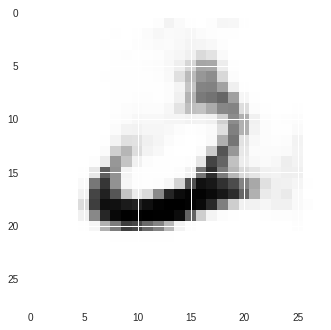

In [0]:
import matplotlib.pyplot as plt

#for i in range(2):
#  plt.subplot(n_digits,10,i+1)

plt.imshow((out[4]).reshape(28,28))